# Building Logistic Regression From Scratch  
(Binary Classification)  
Formula source:  
https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11   
https://medium.com/@bneeraj026/logistic-regression-with-l2-regularization-from-scratch-1bbb078f1e88   
  
  
Math Fomula

- sigmoid function: transform logit ($-\infty$, $+\infty$) to probability (0, 1)    
$$g(z) = \frac{1}{1 + e^{(-z)}}$$
logit = log odds = $log(\frac{p}{1-p})$   
logit transform probability (0, 1) to real number ($-\infty$, $+\infty$)

- Prediction Function (hypothesis $h_\theta(x^{(i)}) $):
$$z(x^{(i)}) = {\theta_0}{x_0} + {\theta_1}{x_1} + ... + {\theta_j}{x_j}$$
$$= \theta^{T}x^{(i)}$$
$$h_\theta(x^{(i)}) = g(z(x^{(i)})) = \frac{1}{1 + e^{(-z(x^{(i)}))}}$$
$$= \frac{1}{1 + e^{(-\theta^{T}x^{(i)})}}$$

where  
        $x_{0}=1$  
        $i =$ the number of data  
        $j =$ the number of features  
        $x^{i}_{j}=$ $i^{th}$ data of $j^{th}$ feature   


- cost of prediction error of an observation:    
$$
Cost(h_{\theta}(x^{(i)}), \: y^{(i)}) = 
        \begin{cases}
                 -log(h_{\theta}(x^{(i)})) \quad if \quad y = 1 \\
                 -log(1 - h_{\theta}(x^{(i)})) \quad if \quad y = 0
        \end{cases}
$$
$$= -y^{(i)} log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)})) $$  

- cost function: Binary Cross Entropy Loss Function (Logistic Loss)  
  Summation of the costs from all training data
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{Cost(h_{\theta}(x^{(i)}), \: y^{(i)})}$$
$$= \frac{1}{m} \sum_{i=1}^{m}{-y^{(i)} log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))}$$  

- cost function with regularization:  
$$ L1:\quad J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{Cost(h_{\theta}(x^{(i)}), \: y^{(i)})} + \frac{\lambda}{m}\sum_{j=1}^{n}|\theta_{j}|$$
$$ L2:\quad J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{Cost(h_{\theta}(x^{(i)}), \: y^{(i)})} + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^2$$  
where 
m = number of samples, n = number of features
- Derivative of the cost function at $\theta_j$  
$$\theta_{j}^{'} = \theta_{j} - \alpha *\frac{1}{m} \sum_{i=1}^{m}[g(w^T x^i) - y^i ] x_j^i$$  

Because, a gradient of $j^{th}$ parameter of the Cost of the prediction at $i^th$ observation, $(x^i, y^i)$:  
$$\frac{\partial}{\partial \theta_j} Cost(h_{\theta}(x^{(i)}), \: y^{(i)})  = [g(\theta^T x) - y^i ] x_j^i$$


### Computing the gradients
Find $\frac{\partial L}{\partial{w}} $
$$L = -ylog(\hat{y}) - (1 - y)log(1 - \hat{y})$$
$$ = -ylog(g(z)) - (1 - y)log(1 - g(z)) $$

Let $g(z) = a$
$$ = -ylog(a) - (1 - y)log(1 - a)$$  

$$\frac{\partial L}{\partial{z}} = \frac{\partial L}{\partial a} * \frac{\partial a}{\partial z}$$  
  
$\frac{\partial}{\partial x}log(x) = \frac{1}{x}$  

$$\frac{\partial L}{\partial a} \quad\quad ... (1)$$
$$= \frac{\partial}{\partial a}[-ylog(a) - (1 - y)log(1 - a) ]$$  
$$ = -\frac{y}{a} - \frac{(1-y)}{(1-a)} \frac{\partial}{\partial a} (1-a)$$  
$$ = -\frac{y}{a} + \frac{(1-y)}{(1-a)}$$ 
  
$$ \frac{\partial a}{\partial z} \quad\quad ... (2)$$   
$$ = \frac{\partial g(z)}{\partial z}
= \frac{\partial}{\partial z} [\frac{1}{1 + e^{-z}}] 
=  \frac{\partial}{\partial z}(1 + e^{-z})^{-1} $$  

$$ = - (1 + e^{-z})^{-2} \frac{\partial}{\partial z}(1 + e^{-z}) 
= - (1 + e^{-z})^{-2} \frac{\partial}{\partial z}e^{-z}$$  
$$ = - (1 + e^{-z})^{-2} e^{-z} \frac{\partial}{\partial z}(-z)$$  
$$= - (1 + e^{-z})^{-2} e^{-z} (-1)$$  
$$= \frac{e^{-z}}{(1 + e^{-z})^2} $$
Adding 1 and substracting 1 from the numerator 
$$=\frac{1 + e^{-z} - 1}{(1 + e^{-z})^2} 
= \frac{1 + e^{-z}}{(1 + e^{-z})^2} - \frac{1}{(1 + e^{-z})^2}$$
$$=\frac{1}{(1 + e^{-z})} - \frac{1}{(1 + e^{-z})^2}
$$  
AS $g(z) = \frac{1}{1 + e^{(-z)}} = a$  
$$ = g(z)(1-g(z)) $$
$$ = a ( 1 - a) $$  

So, the derivative of the sigmoid w.r.t to z is nothing but sigmoid(z) * (1 — sigmoid(z)).  

$$\frac{\partial L}{\partial{z}} = \frac{\partial L}{\partial a} * \frac{\partial a}{\partial z}$$
$$= [-\frac{y}{a} + \frac{(1-y)}{(1-a)}] * [a ( 1 - a)]$$  
$$= [-\frac{y(1-a)}{a(1-a)} + \frac{a(1-y)}{a(1-a)}] * [a ( 1 - a)] $$  
$$= -y + ya + a -ay = a - y$$  
$$= g(z) - y$$   
$$= \frac{1}{1 + e^{(-z)}} - y $$   

Now, we are ready to compute the gradients of the Loss function with respect to w.  
$$z = w^{T}x_j$$ 
where,  
$x_{j}^{i} = $ $j^{th}$ feature value of $i^{th}$ observation  
$X = m*n$ matrix  
$m =$ number of observations  
$n =$ number of features  

$x_0 = 1$ intercept   
$w = w_0, w_1, ..., w_j = $ weights (coefficients) of feature $j$  
$w_0 =$ weight of the intercept  
$j = $ the number of feature  

$$\frac{\partial L}{\partial{w}} = \frac{\partial L}{\partial z} * \frac{\partial z}{\partial w}$$  
$$= [g(z) - y] * \frac{\partial}{\partial w}[wx] $$
$$= [g(z) - y] * x$$  

Therefore 
$$\Delta_{w_j} L = \sum_{i=1}^{m}[g(w_j^T x_j^i) - y^i ]x_j^i $$
 



In [54]:
import numpy as np
import matplotlib.pyplot as plt  

In [4]:
# generate data
def gen_binary_classification_data(m: int, n: int, k: int, random_state=1):
    """
    Generate a dataset of binary clssification
    args:
        m: number of observation
        n: number of features
        k: number of classes
    return:
        reuturn X, y, weights
        X: random generated m x n array, features 
        y: class of the observations by logistic regression
        weights: random generated coefficients which
            used to define y
    """
    def sigmoid(arr):
        return 1 / (1 + np.exp(-arr))
    
    np.random.seed(random_state)
    X = np.random.randint(-100, 100, size=(m,n))
    # add bias (intercept) component
    X = np.hstack((np.ones((m,1)), X))
    # wieght = num of features + bias
    weights = np.random.random(size=(n+1))
    logodds = X@weights
    prob = sigmoid(logodds)
    y = (prob > 0.5).astype(int)
    
    return X[:, 1:], y, weights 

X, y, true_weights = gen_binary_classification_data(10, 2, 2)
print(X[:5, :], y[:5], true_weights, sep='\n')

[[-63.  40.]
 [-28.  37.]
 [ 33. -21.]
 [ 92.  44.]
 [ 29. -29.]]
[0 1 1 1 0]
[0.67046751 0.4173048  0.55868983]


----- initial performance
loss =  0.678729446104099
{'accuracy': 0.3, 'precision': 1.0, 'recall': 0.5, 'f1': 0.6667}
----- training epoch 974
loss =  0.6777285350936799  |  change =  -0.0 %
{'accuracy': 0.3, 'precision': 1.0, 'recall': 0.5, 'f1': 0.6667}
Stop training because of meeting early stop condition!!
true weights: 
 [0.67046751 0.4173048  0.55868983]
estimated bias and weights: 
 0.4169977794660876 [0.42491907 0.71530761]


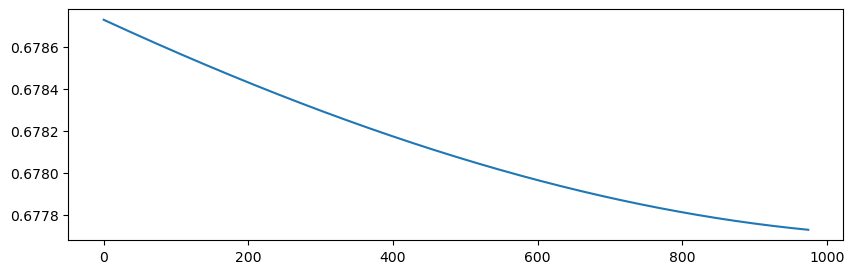

In [94]:
class BaseML():
    def __init__(self, learning_rate = 0.000001, max_iter=1, 
                 verbose = 0, early_stop=0) -> None:
        self.weights = None 
        self.bias = None
        self.m = None 
        self.n = None 
        self.lr = learning_rate
        self.epochs = max_iter
        self.loss_history = []
        self.verbose = verbose
        self.early_stop = early_stop
        
    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model not trained: weights are empty!")
        return X @ self.weights + self.bias 
    
    def metrics_accuracy(self, y_true, y_pred):
        return sum(y_true == y_pred) / y_pred.shape[0]

    def metrics_precision(self, y_true, y_pred):
        return sum((y_true == 1) & (y_pred == 1)) / sum(y_pred == 1)
    
    def metrics_recall(self, y_true, y_pred):
        return sum((y_true == 1) & (y_pred == 1)) / sum(y_true == 1)
    
    def metrics_f1(self, y_true, y_pred):
        precision = self.metrics_precision(y_true, y_pred)
        recall = self. metrics_recall(y_true, y_pred)
        return 2 * (precision * recall)/(precision + recall)
                
    def evaluate(self, true_y, pred_y):

        return {
            'accuracy': np.round(self.metrics_accuracy(true_y, pred_y), 4), 
            'precision': np.round(self.metrics_precision(true_y, pred_y), 4),
            'recall': np.round(self.metrics_recall(true_y, pred_y), 4),
            'f1': np.round(self.metrics_f1(true_y, pred_y), 4)}
    
class logistic_regression(BaseML):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
        self.pred_prob = None
    
    def train(self, X, y):
        # size of the data
        self.m, self.n = X.shape
        # initialize the weights
        np.random.seed(1)
        self.weights = np.random.random(self.n)
        np.random.seed(1)
        self.bias = np.random.random()
        # initial performance
        self.predict(X)
        print("-"*5, "initial performance")
        loss = self.loss_function(true_y=y)
        print("loss = ", loss)
        print(self.evaluate(true_y=y, pred_y=self.pred_prob))
        self.loss_history.append(loss)
        
        # iterate training
        cnt_not_improved = 0
        for epoch in range(1, self.epochs +1):   
            prev_loss = loss 
            # update weights by gradients descent
            self.update_weights(X, y)
            # report performance after training
            self.predict(X)
            loss = self.loss_function(true_y=y)
            loss_change = np.round(((loss - prev_loss)/prev_loss)*100, 4)
            if loss_change < 0:
                cnt_not_improved = 0
            else:
                cnt_not_improved += 1
            self.loss_history.append(loss)
            if ((self.verbose > 0)  and (epoch % self.verbose == 0)) \
                or (self.verbose == 0 and self.epochs == epoch) \
                or (cnt_not_improved == self.early_stop):
                print("-"*5, f"training epoch {epoch}")

                print("loss = ", loss, " | ", "change = ", loss_change, "%")
                print(self.evaluate(true_y=y, pred_y=self.pred_prob))
            
            if (self.early_stop > 0 ) and (cnt_not_improved >= self.early_stop):
                print("Stop training because of meeting early stop condition!!")
                break 
            
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def loss_function(self, true_y, X=None, pred_y=None):
        if pred_y is None and self.pred_prob is None:
            pred_y = self.predict(X)
        else:
            pred_y = self.pred_prob 
        loss = - 1 / self.m * np.sum(
            y*np.log(self.sigmoid(pred_y)) + 
            (1-y)*np.log(1-self.sigmoid(1 - pred_y)))
        return loss
   
    def update_weights(self, X, y):
        # gradient descent
        grad_w = 1/self.m * (self.pred_prob - y)@X
        grad_bias = 1/self.m * np.sum(self.pred_prob - y) 
        self.weights -= self.lr * grad_w
        self.bias -= self.lr * grad_bias 
        
    def predict(self, X):
        self.pred_prob = self.sigmoid(super().predict(X))
        return (self.pred_prob > 0.5).astype(int)
    


lr = logistic_regression(
    learning_rate=0.000001, 
    max_iter=3000, early_stop = 1, verbose=0)
lr.train(X, y)

plt.figure(figsize=(10,3))
plt.plot(lr.loss_history)
print('true weights: \n', true_weights)
print('estimated bias and weights: \n', lr.bias, lr.weights)


# Comparing with sklearn results 

In [160]:
# Generate New X by range of min max of each feature
min_max_f = [(min_f, max_f) for min_f, max_f in zip(X.min(axis=0), X.max(axis=0))]
X_new = np.hstack([np.linspace(min_f, max_f, 2000).reshape(-1,1) for min_f, max_f in min_max_f])
X_new.shape

(2000, 2)

----- initial performance
loss =  0.678729446104099
{'accuracy': 0.3, 'precision': 1.0, 'recall': 0.5, 'f1': 0.6667}
----- training epoch 974
loss =  0.6777285350936799  |  change =  -0.0 %
{'accuracy': 0.3, 'precision': 1.0, 'recall': 0.5, 'f1': 0.6667}
Stop training because of meeting early stop condition!!
SKlearn scores:  {'accuracy': 0.3, 'precision': 1.0, 'recall': 0.5, 'f1': 0.6667} (10,)
Sk learn weights [-0.26604922] [[0.3899277  0.47333428]]
my Scores:  {'accuracy': 0.3, 'precision': 1.0, 'recall': 0.5, 'f1': 0.6667} (10,)
my bias and weights 0.4169977794660876 [0.42491907 0.71530761]
True weights [0.67046751 0.4173048  0.55868983]


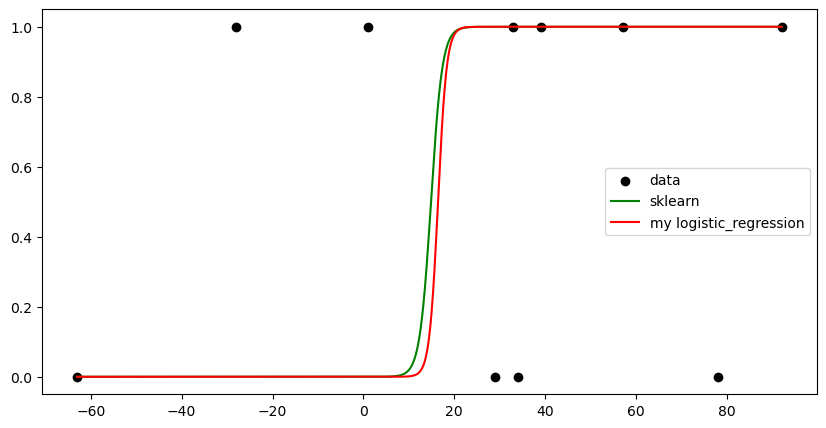

In [161]:
from sklearn.linear_model import LogisticRegression
sk_lr = LogisticRegression(fit_intercept=True)
sk_lr.fit(X,y)
sk_pred = sk_lr.predict_proba(X)[:, 1]

lr = logistic_regression(
    learning_rate=0.000001, 
    max_iter=3000, early_stop = 1, verbose=0)
lr.train(X, y)

print("SKlearn scores: ", lr.evaluate(true_y=y, pred_y=sk_pred), sk_pred.shape)
print("Sk learn weights", sk_lr.intercept_, sk_lr.coef_, )
print("my Scores: ", lr.evaluate(true_y=y, pred_y=lr.pred_prob), lr.pred_prob.shape)
print("my bias and weights", lr.bias, lr.weights)
print("True weights", true_weights)

my_pred = lr.predict(X_new)
plt.figure(figsize=(10, 5))
plt.scatter(x=X[:, 0], y=y, c='black', label='data')
plt.plot(X_new[:, 0], sk_lr.predict_proba(X_new)[:, 1], 
         c='green', label='sklearn')
plt.plot(X_new[:, 0], lr.pred_prob, 
         c='red', label='my logistic_regression')
plt.legend()
plt.show()